Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.


In [100]:
#Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
import pydotplus
from IPython.display import Image

In [101]:
data=pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [102]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch(Parents/children aboard), and Fare to predict whether a passenger survived.

In [103]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [104]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [105]:
data[['Name','Sex','Ticket','Embarked']].describe()

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Funk, Miss. Annie Clemmer",male,1601,S
freq,1,577,7,644


In [106]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [107]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [108]:
data.drop(['PassengerId','Cabin','Embarked','Ticket'],axis=1,inplace=True)

In [109]:
data.Age=data.Age.fillna(data.Age.mean())

In [110]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [111]:
sex_cat=pd.get_dummies(data.Sex,drop_first=True)
data=pd.concat([data,sex_cat],axis=1)

In [112]:
data.drop('Sex',axis=1,inplace=True)

In [113]:
data

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male
0,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.000000,0,0,13.0000,1
887,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,30.0000,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,23.4500,0
889,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,30.0000,1


In [114]:
X=data[['Pclass','male','Age','SibSp','Parch','Fare']]
Y=data['Survived']
x_train,x_test,y_train,y_test=train_test_split(X,Y,
                                               test_size=0.3)

In [115]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8022388059701493

In [116]:
pred=clf.predict(x_test)

In [117]:
print(metrics.confusion_matrix(y_train,clf.predict(x_train)))
cm=metrics.confusion_matrix(y_test,pred)
cm

[[375   0]
 [  6 242]]


array([[143,  31],
       [ 22,  72]], dtype=int64)

In [118]:
tp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tn=cm[1][1]
print(tp,fn)
print(fp,tn)

143 22
31 72


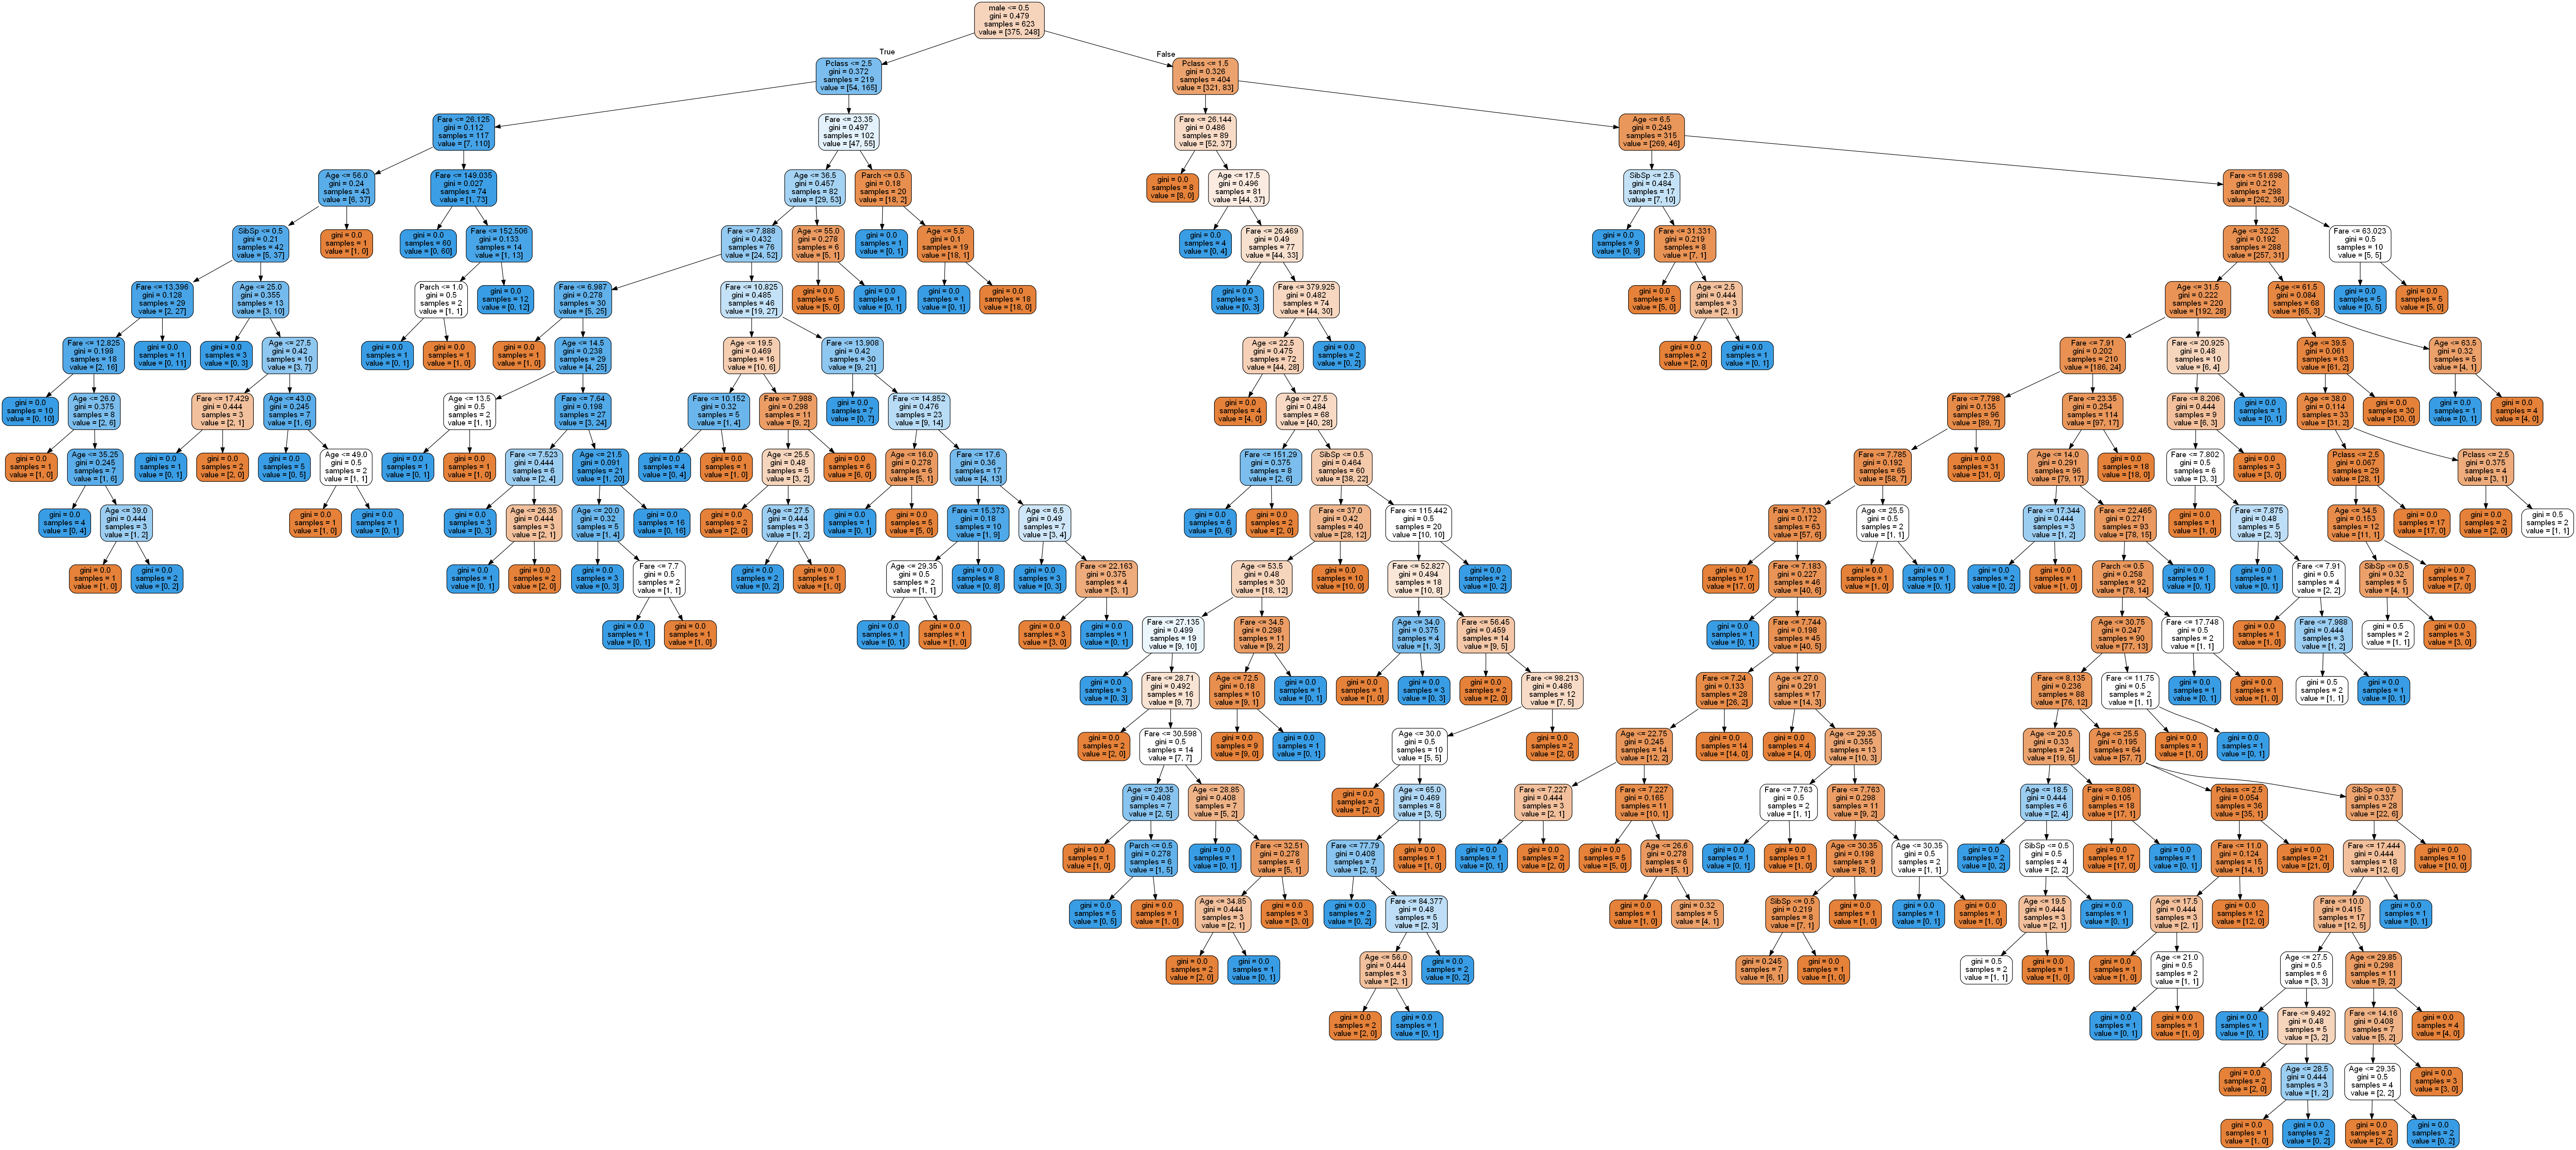

In [119]:
#plotting the visualization
dot_data=export_graphviz(clf,feature_names=X.columns,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [120]:
grid_params={
    'criterion' : ["gini", "entropy"],
    'splitter' : ["best", "random"],
    'max_depth' : range(2,40,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    }

In [121]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_params,cv=10,n_jobs=-1)

In [122]:
#grid_search.fit(x_train,y_train)------------------>trained on colab

In [123]:
clf=DecisionTreeClassifier(criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=None,
                                              splitter='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [124]:
pred=clf.predict(x_test)

In [125]:
metrics.confusion_matrix(y_test,pred)

array([[141,  33],
       [ 24,  70]], dtype=int64)

In [126]:
clf.score(x_train,y_train)

0.9903691813804173

In [127]:
clf.score(x_test,y_test)

0.7873134328358209